# Introduction

The purpose of this report is to provide an overview and the results of retrieval evaluation. The [github repository](https://github.com/brandonstarxel/chunking_evaluation/tree/main) and the [chroma technical report](https://research.trychroma.com/evaluating-chunking#recursivecharactertextsplitter-&-tokentextsplitter-[-]) serve as the main point of reference. This report serves as a guide through the process of preparing given data - chunking, and experimenting with parameters that affect the quality of retrieval.

# Chunking

The first step towards successfully extracting information from text corpus ("Wikitexts") is splitting it into more managable pieces. For this, I used the implementation of the **FixedTokenChunker** class from the github repository. It utilizes OpenAI's *tiktoken* library to convert text into tokens and vice versa. When it comes to the splitting algorithm, it uses the most straightforward approach with chunk size parameter determining the number of tokens contained in a chunk.


# Evaluation metrics

In order to evaluate the quality of our retrieval model, we will use two measures called **precision** and **recall**. Precision is expressed as a ratio of number of retrieved tokens that provide information relevant to a given query and the total amount of retrieved tokens. On the other hand, recall numerically represent how many useful tokens are gathered with regard to every token in every relevant excerpt. The figure below gives a visual interpretation of both criteria.

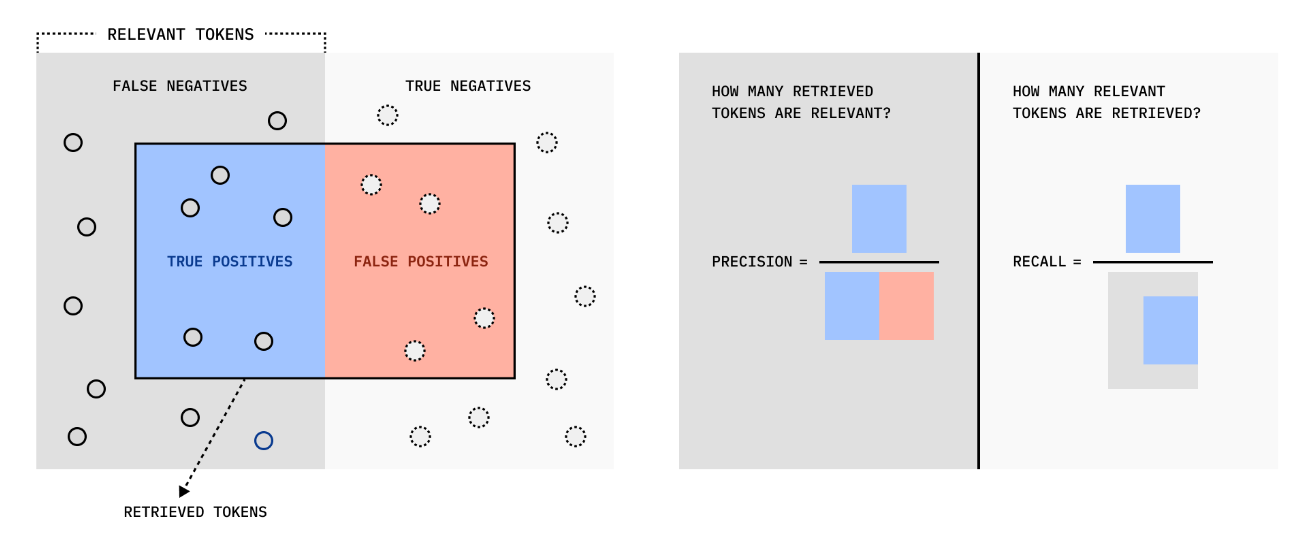

It is important to mention that recall can easily be maximised by simply finding every bit of information related to a given query and retrieving all excerpts containing it. However, this approach is suboptimal as it uses brute force to achieve maximum recall value. Another obvious strategy to increase this criterion is to make chunk size parameter arbitrarily large so that the targeted excerpts are completely captured by a couple of chunks.

In contrast, when it comes to precision, common sense tells us that it is maximised by decreasing the chunk size parameter and selecting as few retrievals as possible. However, we will see that this measurement is somewhat harder to get to a certain value than its counterpart.

To sum up, it is easy to see how the chunk size and number of retrieved excerpts affect evaluation metrics. Knowing that there is a negative correlation between the measures, we will look out for sweet spots where both the recall and precision values are acceptable. Experiments will show exactly how the values are distributed.




# Retrieval pipeline

The process consists of creating the embeddings for all chunks using **multi-qa-mpnet-base-dot-v1** embedding model and storing them in a **chromadb** collection. The same is done with questions from *questions_df.csv*. Then, we search through the collection of chunks to find the most semantically similar pieces of text to each question. This is effectively done by *query()* method assigned to every chromadb collection which uses cosine similarity.



# Evaluation and Results

After we obtain useful chunks of text with *query()* method, they are evaluated accross already mentioned metrics, recall and precision. In addition, we also examine *Intersection over Union* measure which is very similar to precision both when it comes to actual values as well as the definition. Experiments were conducted on a relatively small set of values, however they give a clear picture on how chunk size, overlap size and number of retrieved chunks affect the quality of retrieval.

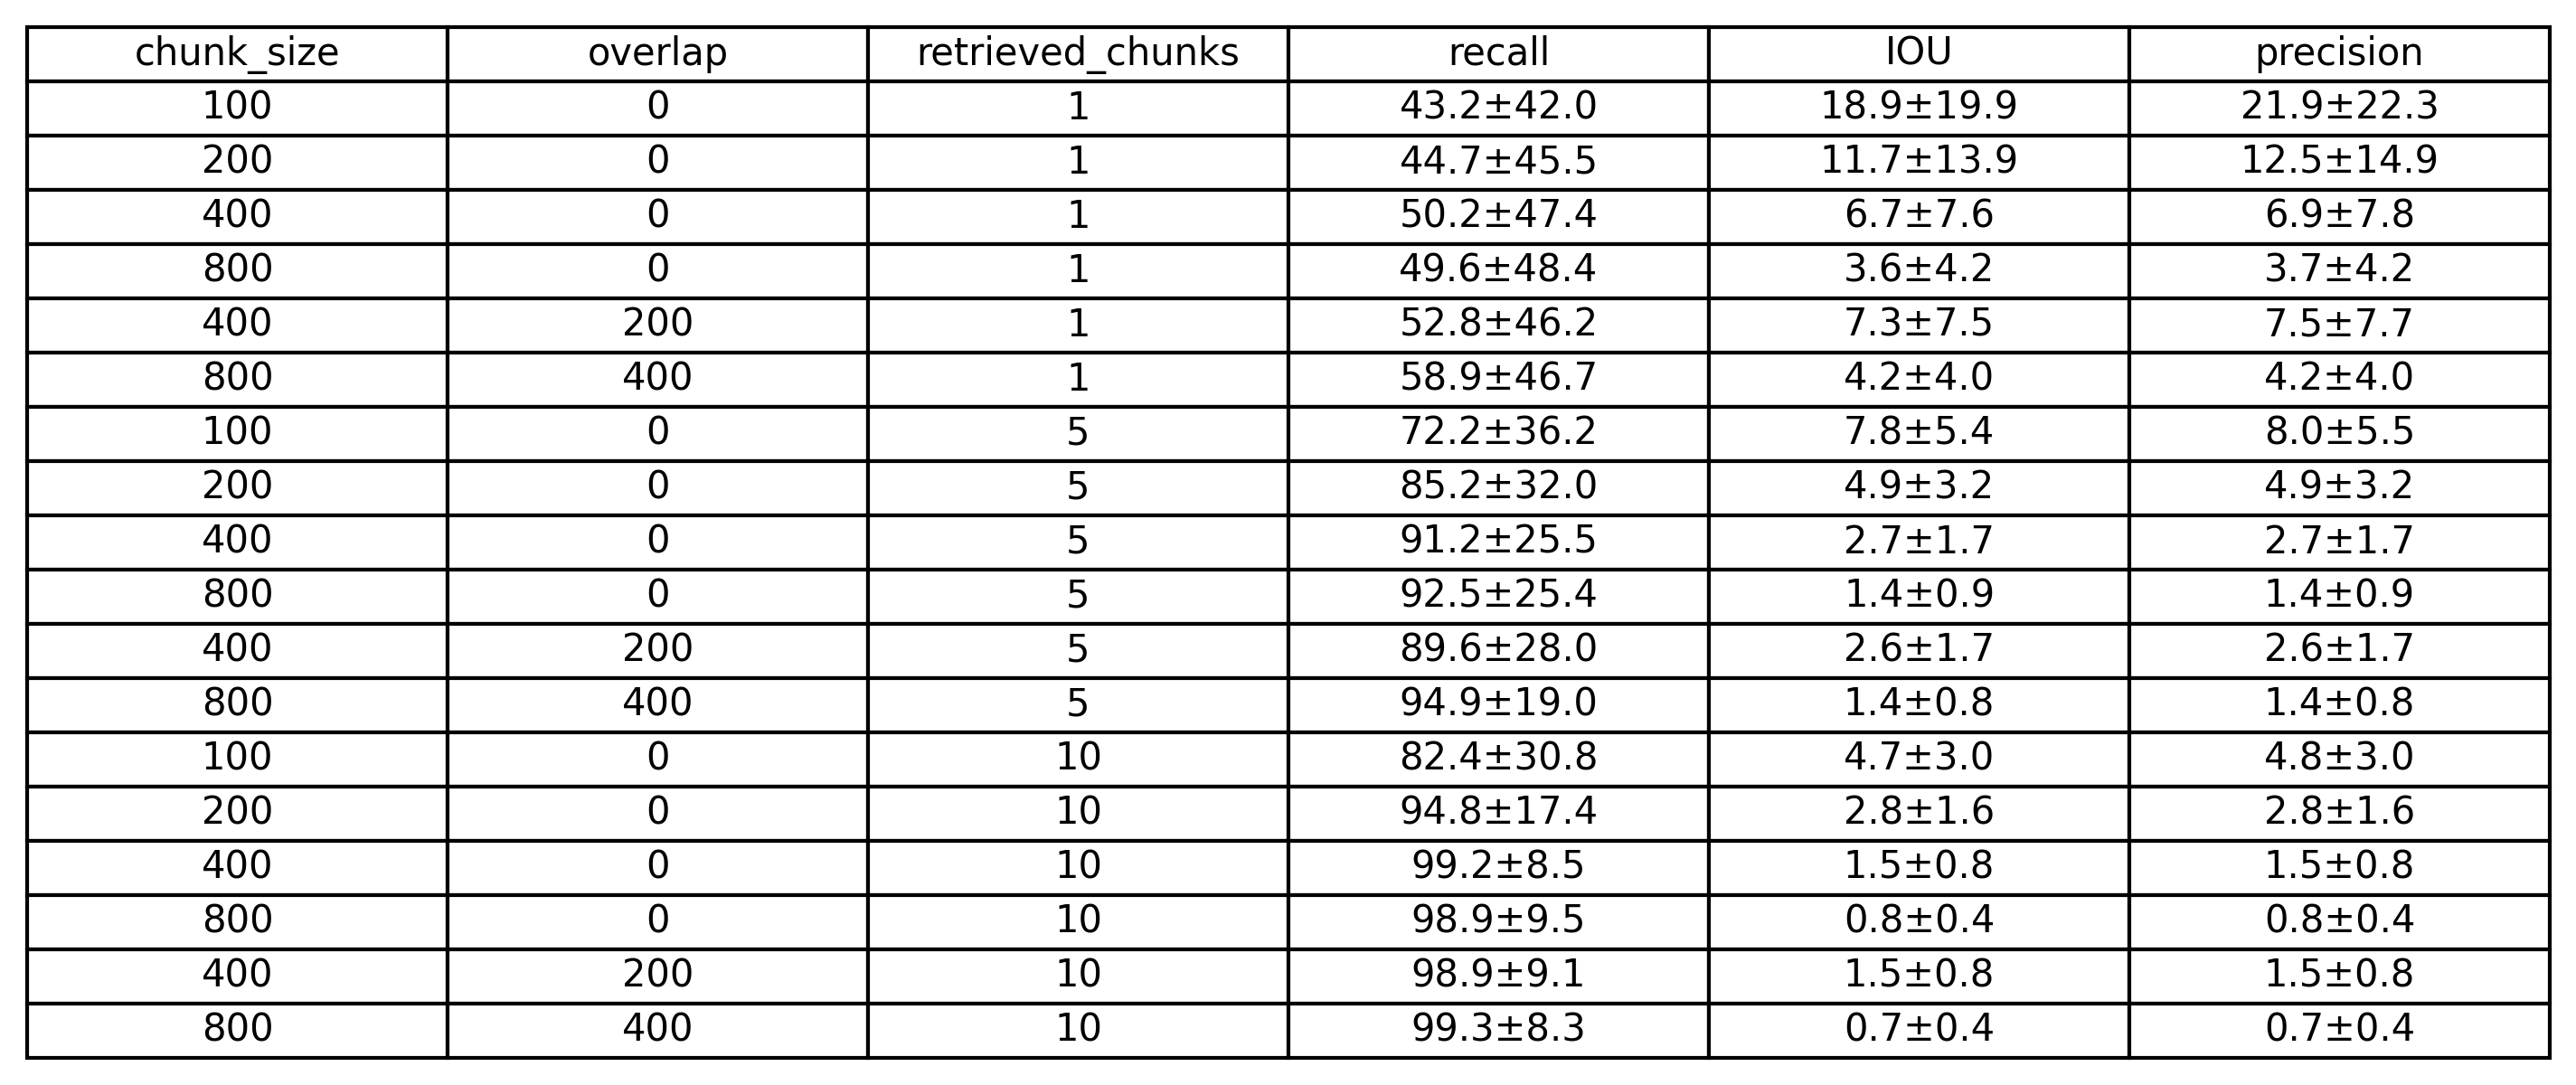

Reading the values from the table, we notice that the assumptions about recall and precision criteria were true. Namely, chunk size of 100 retains highest precision values, and in general, smaller parameters produce higher precision scores. On the other side, if we want to cover as much useful information as possible, we opt for more retrievals or bigger chunks. Specifically, already 10 excerpts of 400 tokens are almost guaranteed to capture every bit of relevant information.

It shouldn't come as a surprise that overlap size affects recall and precision only in pair with small number of retrievals and has little to no effect when that's not the case. The reason for this is that with overlap we have more chunks to consider, therefore we can expect that the more relevant one will be retrieved. When we retrieve more chunks, those with overlaps share a great proportion of tokens (in our case 50%) and there is a high likelyhood that exactly the ones overlaping will be retrieved which should reduce precision.

When it comes to computing time, it is always recommended to optimise for smaller amount of chunks, both while splitting as well as retrieving.

To summarize, there should always be a balance between main parameters in order to achieve best results. Conducted experiments show that for our conditions, on a "Wikitexts" dataset, using already mentioned tools, the sweet spot would imply 5 retrievals with 200-400 tokens a chunk without overlap or 10 retrievals with chunk size 200.

